<a href="https://colab.research.google.com/github/AbdullahRagheb/AutoimmuneDetector/blob/main/multi_label_autoimmune_disorder_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
abdullahragheb_all_autoimmune_disorder_10k_path = kagglehub.dataset_download('abdullahragheb/all-autoimmune-disorder-10k')

print('Data source import complete.')


# **Autoimmune Disease**
Autoimmune disease happens when the body’s natural defense system can’t tell the difference between your own cells and foreign cells, causing the body to mistakenly attack normal cells. There are more than 80 types of autoimmune diseases that affect a wide range of body parts.

**Common autoimmune diseases in women include:**

Rheumatoid arthritis, a form of arthritis that attacks the joints
Psoriasis, a condition marked by thick, scaly patches of skin
Psoriatic arthritis, a type of arthritis affecting some people with psoriasis
Lupus, a disease that damages areas of the body that include joints, skin and organs
Thyroid diseases, including Graves’ disease, where the body makes too much thyroid hormone (hyperthyroidism), and Hashimoto’s thyroiditis, where it doesn’t make enough (hypothyroidism) of the hormone
Type 1 diabetes, a condition in which the immune system damages the insulin-producing cells in the pancreas

Symptoms of autoimmune disease may be severe in some people and mild in others. “There are different degrees of autoimmune disease,” says Orbai. “The symptoms a person gets likely relate to multiple factors that include genetics, environment and personal health.”

**Common Autoimmune Disease Symptoms**
Despite the varying types of autoimmune disease, many of them share similar symptoms. Common symptoms of autoimmune disease include:

* Fatigue
* Joint pain and swelling
* Skin problems
* Abdominal pain or digestive issues
* Recurring fever
* Swollen glands

Many women say it’s hard to get diagnosed, something that Orbai agrees with. “It’s not black or white,” she says. “There’s usually no single test to diagnose autoimmune disease. You have to have certain symptoms combined with specific blood markers and in some cases, even a tissue biopsy. It’s not just one factor.”

Diagnosis can also be difficult because these symptoms can come from other common conditions. Orbai says women should seek treatment when they notice new symptoms.

“If you’ve been healthy and suddenly you feel fatigue or joint stiffness, don’t downplay that,” she says. “Telling your doctor helps him or her to look closer at your symptoms and run tests to either identify or rule out autoimmune disease.”

# **1- Importing libraries**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/kaggle/input/all-autoimmune-disorder-10k/Complete_Updated_Autoimmune_Disorder_Dataset2.csv')

# Display basic information and check for null values
data.info()
data.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13812 entries, 0 to 13811
Data columns (total 79 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            13812 non-null  int64  
 1   Age                                   13812 non-null  int64  
 2   Gender                                13812 non-null  object 
 3   Diagnosis                             13812 non-null  object 
 4   Sickness_Duration_Months              13812 non-null  int64  
 5   RBC_Count                             13812 non-null  float64
 6   Hemoglobin                            13812 non-null  float64
 7   Hematocrit                            13812 non-null  float64
 8   MCV                                   13812 non-null  float64
 9   MCH                                   13812 non-null  float64
 10  MCHC                                  13812 non-null  float64
 11  RDW            

Patient_ID     0
Anti_Ro_SSA    0
Anti_IF        0
ASMA           0
Anti_BP180     0
              ..
C3             0
ESR            0
MBL_Level      0
Esbach         0
Anti_Sm        0
Length: 79, dtype: int64

# **2- Statistical summary**

In [ ]:
# Statistical summary of numeric columns
data.describe()

# Explore unique values in categorical columns like Gender and Diagnosis
data['Gender'].value_counts()
data['Diagnosis'].value_counts()


Diagnosis
Autoimmune orchitis                   2490
Systemic lupus erythematosus (SLE)    2390
Rheumatoid arthritis                  2310
Normal                                2230
Sjögren syndrome                      2200
Graves' disease                       2192
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding Gender and Diagnosis columns
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Diagnosis'] = LabelEncoder().fit_transform(data['Diagnosis'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Diagnosis Distribution')

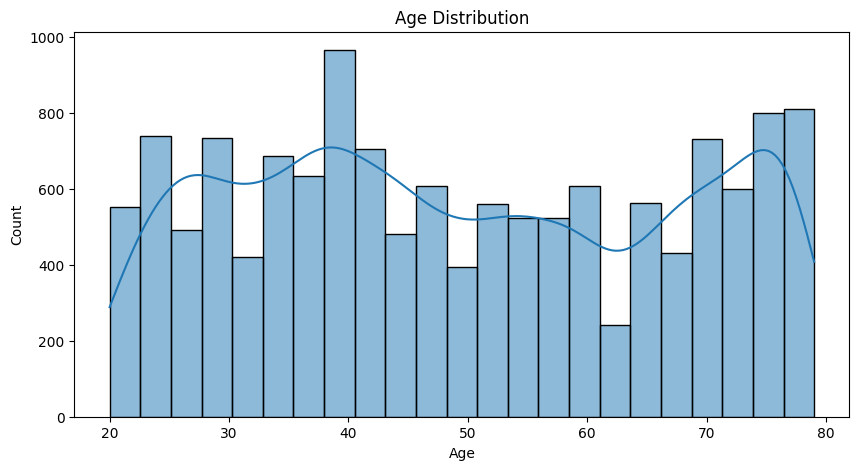

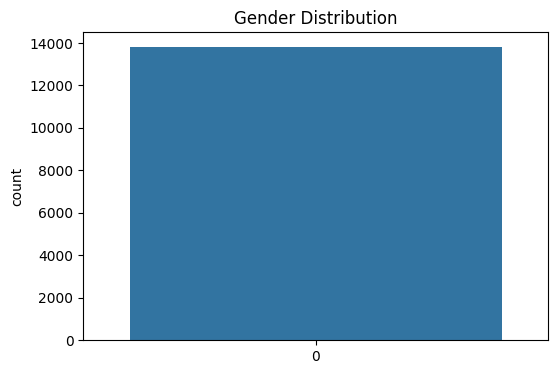

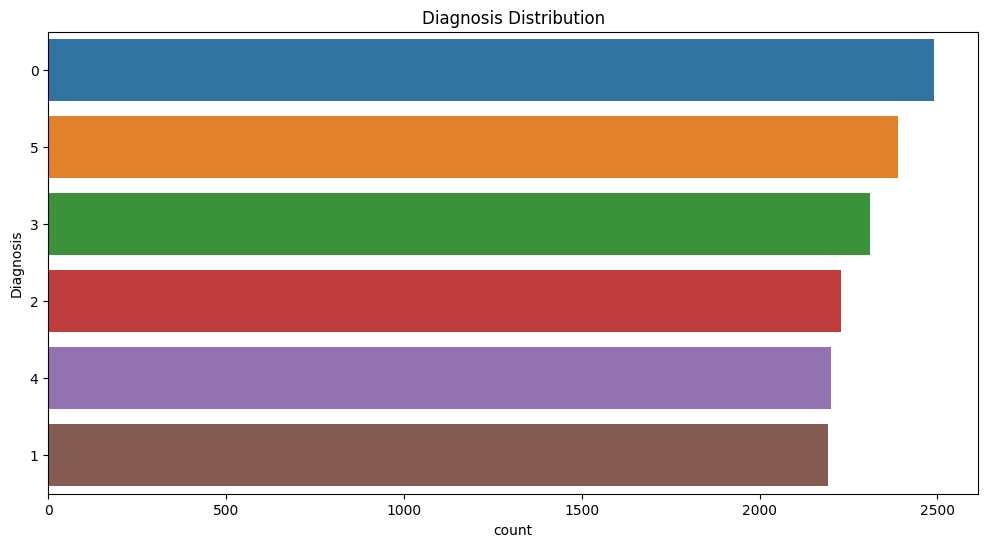

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['Gender'])
plt.title('Gender Distribution')

# Diagnosis Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Diagnosis', data=data, order=data['Diagnosis'].value_counts().index)
plt.title('Diagnosis Distribution')

Text(0.5, 1.0, 'Correlation Matrix of Clinical Features')

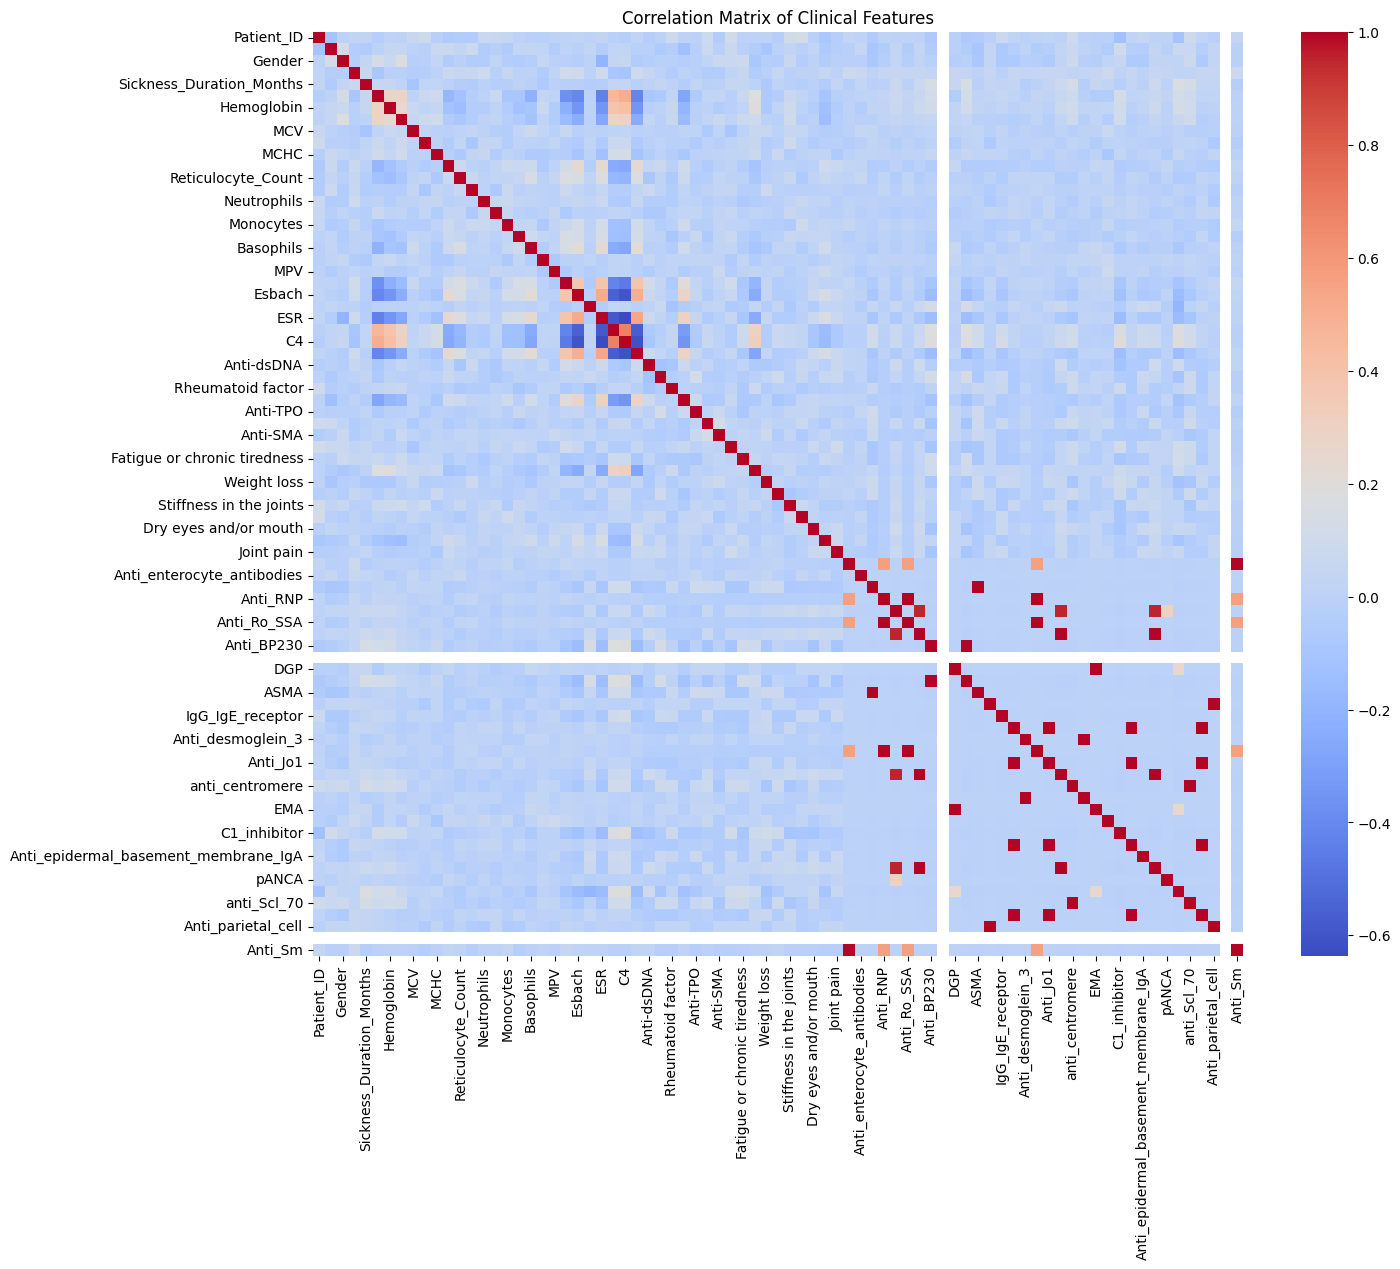

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title('Correlation Matrix of Clinical Features')


Text(0.5, 1.0, 'RBC Count vs Hemoglobin by Diagnosis')

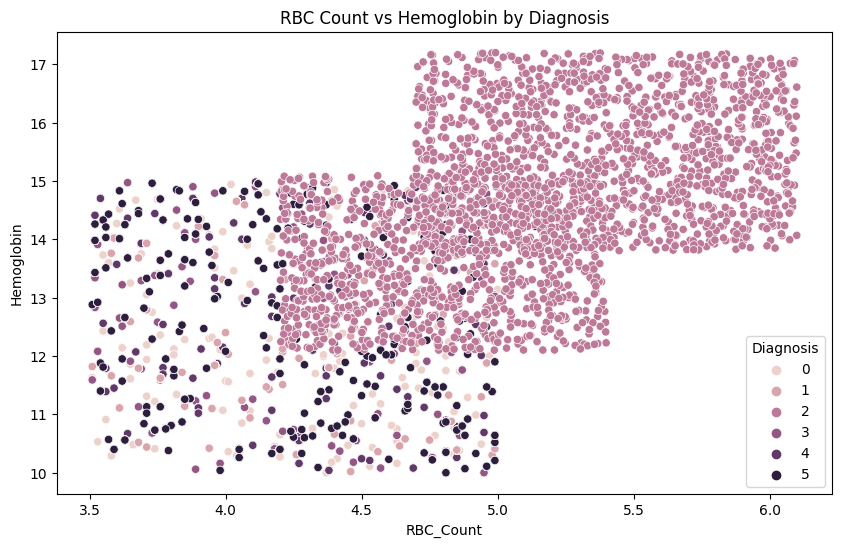

In [ ]:
# Scatter plot of RBC_Count and Hemoglobin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RBC_Count', y='Hemoglobin', hue='Diagnosis', data=data)
plt.title('RBC Count vs Hemoglobin by Diagnosis')

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert Diagnosis column to list of lists format, where each label is a list (even if single)
data['Diagnosis'] = data['Diagnosis'].apply(lambda x: [x])

# Use MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['Diagnosis'])
disease_classes = mlb.classes_

# Verify the result
print(y.shape)  # Should have shape (num_samples, num_classes)

(13812, 6)


# **3- torch.nn.Transformer**

torch.nn.Transformer is a module in PyTorch that provides an implementation of the Transformer architecture, which is widely used in natural language processing (NLP) tasks like translation, text generation, and more. The Transformer model was introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017 and has since become a foundational component for many NLP models, including BERT and GPT.

**Key Concepts of torch.nn.Transformer:**

Self-Attention Mechanism:
The self-attention mechanism allows the model to weigh the importance of different words in a sentence relative to each other when processing a sequence. This is how the model can understand the context of words in relation to each other, making it highly effective for tasks involving sequences of text.

**Encoder-Decoder Structure:**

**The Transformer model consists of an encoder and a decoder:**
Encoder: Processes the input sequence and creates a representation of it.
Decoder: Uses the representation from the encoder along with additional input (e.g., a previously generated sequence) to produce the output sequence.
In PyTorch, you can use torch.nn.TransformerEncoder and torch.nn.TransformerDecoder separately if needed.

**Multi-Head Attention:**
The model uses multiple "attention heads" to learn different types of relationships between words in a sentence. Each head computes attention independently, and their outputs are concatenated and linearly transformed to provide a better representation of the data.

**Positional Encoding:**
Since Transformers do not inherently understand the order of words (unlike RNNs or LSTMs), positional encodings are added to the input embeddings to incorporate information about the position of each word in the sequence.

**Feed-Forward Layers:**
Each layer of the encoder and decoder includes a position-wise feed-forward network that consists of fully connected layers. This helps transform the representation learned by the attention mechanism into more complex features.

**Normalization and Residual Connections:**
The Transformer uses LayerNorm and residual connections to ensure stable training and to facilitate gradient flow. This helps avoid the vanishing gradient problem and maintains more stable training dynamics.

In [ ]:
import torch
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW
import torch.nn as nn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import numpy as np

# Split the features and labels
features = data.drop(columns=['Diagnosis'])  # Drop target column
labels = y  # Multi-label target from previous step

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
class AutoimmuneDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return {
            'features': torch.tensor(self.features[idx], dtype=torch.float),
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }

# Create DataLoader objects
train_dataset = AutoimmuneDataset(X_train, y_train)
val_dataset = AutoimmuneDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [ ]:
class MultiLabelNN(nn.Module):
    def __init__(self, input_dim, n_classes):
        super(MultiLabelNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, n_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.softmax(self.out(x), dim=1)  # Using softmax here

# Initialize the model
model = MultiLabelNN(input_dim=X_train.shape[1], n_classes=labels.shape[1])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [ ]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for batch in data_loader:
        features = batch['features'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Return the average loss per batch
    avg_loss = total_loss / len(data_loader)
    return avg_loss

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

def evaluate_epoch(model, data_loader, criterion, device, threshold=0.5):
    model.eval()
    total_loss = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in data_loader:
            features = batch['features'].to(device)
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Apply threshold to get binary predictions
            preds = (outputs > threshold).int().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    # Calculate average loss
    avg_loss = total_loss / len(data_loader)

    # Flatten lists to arrays for metric calculation
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # Compute additional metrics
    f1_micro = f1_score(all_labels, all_preds, average='micro')
    f1_macro = f1_score(all_labels, all_preds, average='macro')
    accuracy = accuracy_score(all_labels, all_preds)

    # Return metrics and the collected labels and predictions
    return {
        "val_loss": avg_loss,
        "f1_micro": f1_micro,
        "f1_macro": f1_macro,
        "accuracy": accuracy,
        "all_labels": all_labels,
        "all_preds": all_preds
    }


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 200  # Adjust as necessary

# Initialize lists to store metrics
train_losses = []
val_losses = []
val_f1_scores = []
val_accuracies = []
all_labels = []
all_preds = []

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_metrics = evaluate_epoch(model, val_loader, criterion, device)

    # Append metrics to lists
    train_losses.append(train_loss)
    val_losses.append(val_metrics["val_loss"])
    val_f1_scores.append(val_metrics["f1_micro"])
    val_accuracies.append(val_metrics["accuracy"])

    # Store the all_labels and all_preds for confusion matrix after training
    all_labels = val_metrics["all_labels"]
    all_preds = val_metrics["all_preds"]

    # Print metrics for each epoch
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Val Loss: {val_metrics['val_loss']:.4f}, Val F1 Score: {val_metrics['f1_micro']:.4f}, Accuracy: {val_metrics['accuracy']:.4f}")


Epoch 1/200
Train Loss: 0.4479
Val Loss: 0.4443, Val F1 Score: 0.0000, Accuracy: 0.0000
Epoch 2/200
Train Loss: 0.4398
Val Loss: 0.4352, Val F1 Score: 0.0000, Accuracy: 0.0000
Epoch 3/200
Train Loss: 0.4283
Val Loss: 0.4216, Val F1 Score: 0.0122, Accuracy: 0.0062
Epoch 4/200
Train Loss: 0.4121
Val Loss: 0.4038, Val F1 Score: 0.1178, Accuracy: 0.0626
Epoch 5/200
Train Loss: 0.3931
Val Loss: 0.3857, Val F1 Score: 0.2573, Accuracy: 0.1477
Epoch 6/200
Train Loss: 0.3766
Val Loss: 0.3718, Val F1 Score: 0.2817, Accuracy: 0.1640
Epoch 7/200
Train Loss: 0.3646
Val Loss: 0.3620, Val F1 Score: 0.2865, Accuracy: 0.1672
Epoch 8/200
Train Loss: 0.3562
Val Loss: 0.3548, Val F1 Score: 0.2897, Accuracy: 0.1694
Epoch 9/200
Train Loss: 0.3498
Val Loss: 0.3493, Val F1 Score: 0.2939, Accuracy: 0.1723
Epoch 10/200
Train Loss: 0.3448
Val Loss: 0.3447, Val F1 Score: 0.2971, Accuracy: 0.1744
Epoch 11/200
Train Loss: 0.3406
Val Loss: 0.3407, Val F1 Score: 0.3044, Accuracy: 0.1795
Epoch 12/200
Train Loss: 0.336

In [ ]:
import numpy as np
import torch

def get_predictions(model, data_loader, device, threshold=0.5):
    model.eval()
    all_preds = []

    with torch.no_grad():
        for batch in data_loader:
            features = batch['features'].to(device)

            # Forward pass to get model outputs
            outputs = model(features)

            # Apply threshold to get binary predictions
            preds = (outputs > threshold).int().cpu().numpy()
            all_preds.extend(preds)

    # Convert predictions to a numpy array
    all_preds = np.array(all_preds)
    return all_preds

In [ ]:
# Define the mapping from label index to disease name
label_mapping = {
    0: "Autoimmune orchitis",
    1: "Graves' disease",
    2: "Sjögren syndrome",
    3: "Rheumatoid arthritis",
    4: "Normal",
    5: "Systemic lupus erythematosus (SLE)"
}

In [ ]:
# Use get_predictions function to get binary predictions
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predictions = get_predictions(model, train_loader, device)  # or val_loader

# Convert predictions to disease names using label_mapping
predicted_labels = []
for sample in predictions:
    diseases = [label_mapping[idx] for idx, label in enumerate(sample) if label == 1]
    predicted_labels.append(diseases if diseases else ["No labels predicted"])

# Display the results
for i, labels in enumerate(predicted_labels):
    print(f"Sample {i+1}: {', '.join(labels)}")

Sample 1: Graves' disease
Sample 2: Autoimmune orchitis
Sample 3: Autoimmune orchitis
Sample 4: Normal
Sample 5: Autoimmune orchitis
Sample 6: Graves' disease
Sample 7: Normal
Sample 8: Autoimmune orchitis
Sample 9: Autoimmune orchitis
Sample 10: Systemic lupus erythematosus (SLE)
Sample 11: Rheumatoid arthritis
Sample 12: Rheumatoid arthritis
Sample 13: Normal
Sample 14: Systemic lupus erythematosus (SLE)
Sample 15: Autoimmune orchitis
Sample 16: Graves' disease
Sample 17: Normal
Sample 18: Systemic lupus erythematosus (SLE)
Sample 19: Sjögren syndrome
Sample 20: Normal
Sample 21: Normal
Sample 22: Systemic lupus erythematosus (SLE)
Sample 23: Autoimmune orchitis
Sample 24: Normal
Sample 25: Rheumatoid arthritis
Sample 26: Normal
Sample 27: Sjögren syndrome
Sample 28: Sjögren syndrome
Sample 29: Systemic lupus erythematosus (SLE)
Sample 30: Systemic lupus erythematosus (SLE)
Sample 31: Systemic lupus erythematosus (SLE)
Sample 32: Normal
Sample 33: Systemic lupus erythematosus (SLE)
S

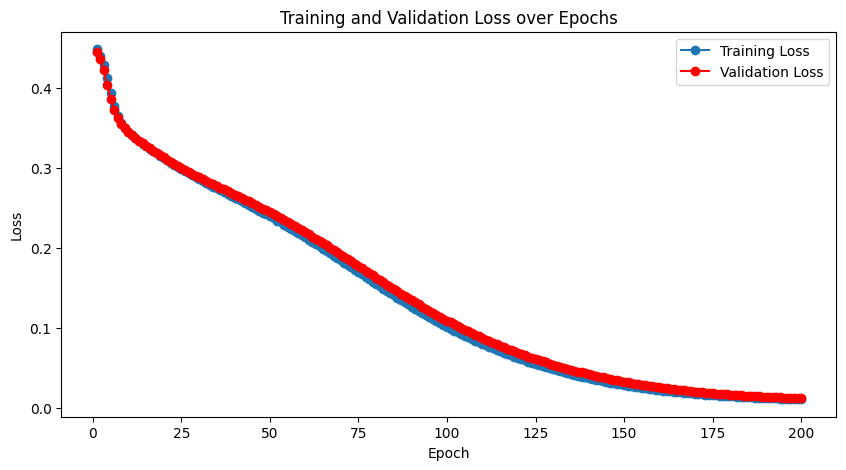

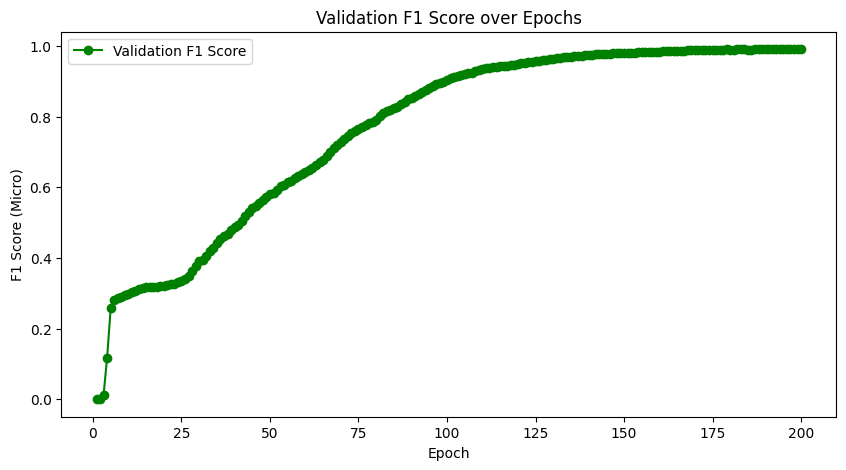

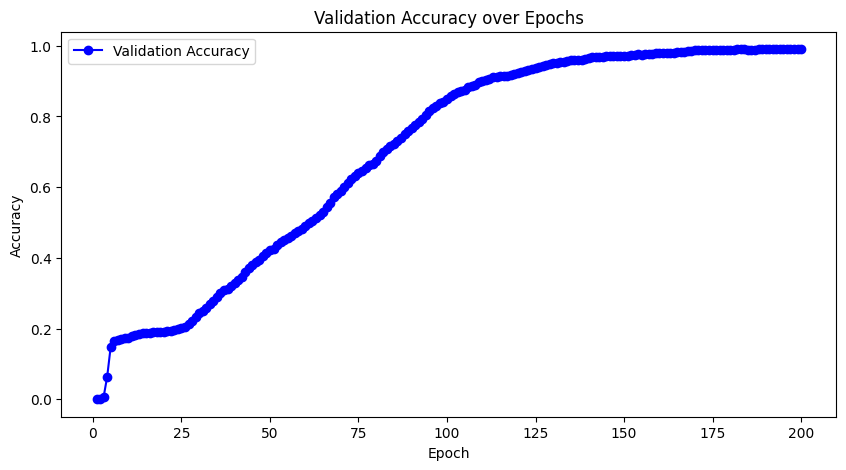

In [ ]:
import matplotlib.pyplot as plt

# Define the range of epochs
epochs = range(1, num_epochs + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plot Validation F1 Score
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_f1_scores, label='Validation F1 Score', marker='o', color='green')
plt.xlabel('Epoch')
plt.ylabel('F1 Score (Micro)')
plt.title('Validation F1 Score over Epochs')
plt.legend()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.show()


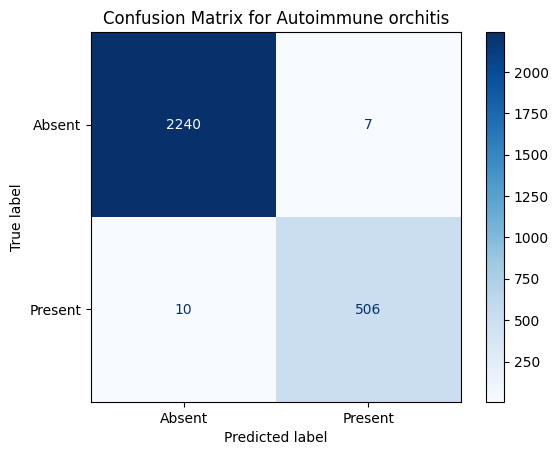

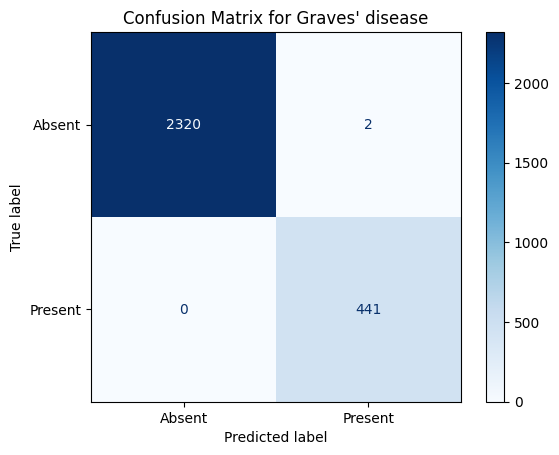

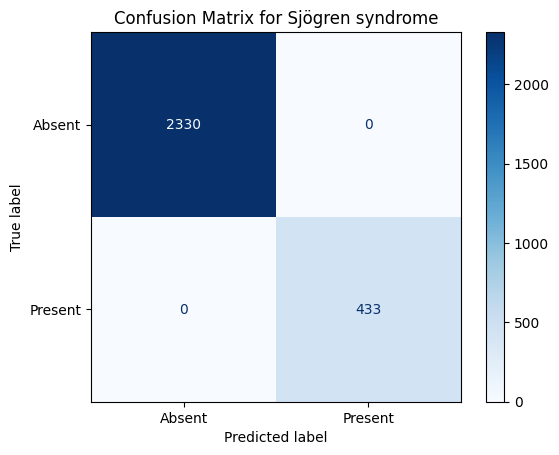

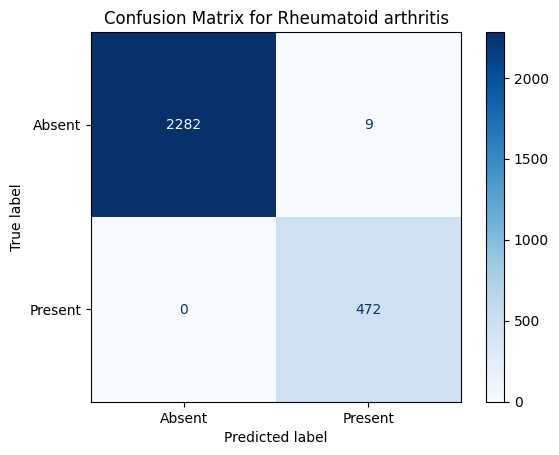

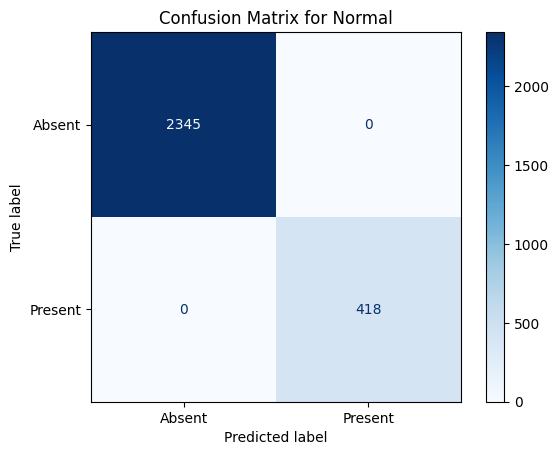

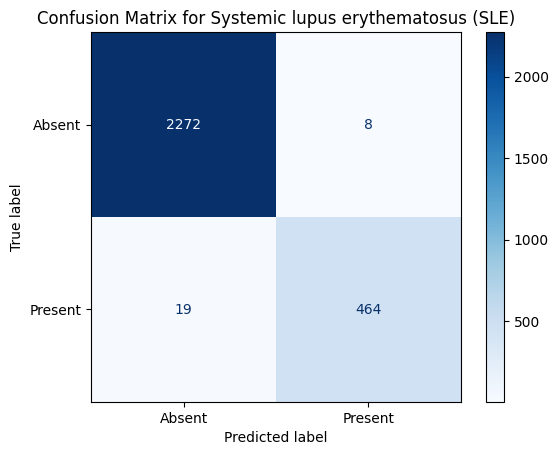

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# Assuming `all_labels` and `all_preds` are numpy arrays with true and predicted labels respectively
# Each should be a 2D array where each row is a sample and each column is a label

# Calculate confusion matrices for each label
conf_matrices = multilabel_confusion_matrix(all_labels, all_preds)

# Label mapping for each class (use your actual disease names here)
label_mapping = {
    0: "Autoimmune orchitis",
    1: "Graves' disease",
    2: "Sjögren syndrome",
    3: "Rheumatoid arthritis",
    4: "Normal",
    5: "Systemic lupus erythematosus (SLE)"
}

# Plot each confusion matrix
for i, (cm, label) in enumerate(zip(conf_matrices, label_mapping.values())):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Absent", "Present"])
    disp.plot(cmap="Blues")
    plt.title(f'Confusion Matrix for {label}')
    plt.show()

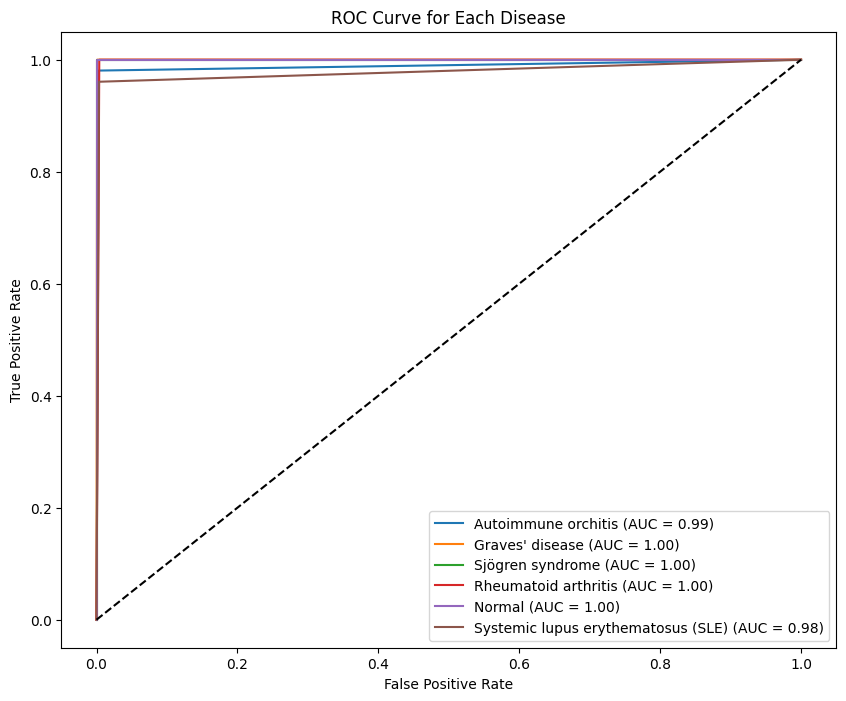

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Loop through each label to calculate and plot the ROC curve
for i, label in enumerate(label_mapping.values()):
    fpr, tpr, _ = roc_curve(all_labels[:, i], all_preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Disease')
plt.legend()
plt.show()

In [ ]:
#import joblib
# Save scaler after training
#joblib.dump(scaler, 'scaler.pkl')

In [ ]:
#model_path = "multi_label_nn_model2.pth"
#torch.save(model.state_dict(), model_path)
#print(f"Model saved to {model_path}")